Name:Yuheng Chen

Github Username: YuhengCh

USC ID: 9135161440

In [482]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import cross_val_score

### 1. Decision Trees as Interpretable Models

#### (a) Download the Accute Inflamations data

In [38]:
diag = pd.read_csv('../data/Homework_5_data/diagnosis.data', \
            encoding='utf-16', sep='\t', \
            names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'])
diag

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Bladder,Pelvis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [57]:
diag['Temperature'][0]

'35,5'

#### (b) Build a decision tree on the whole data set and plot it

In [135]:
diag.columns[1:8]

Index(['Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra', 'Bladder',
       'Pelvis'],
      dtype='object')

In [139]:
from sklearn.tree import DecisionTreeClassifier
diag = pd.read_csv('../data/Homework_5_data/diagnosis.data', \
            encoding='utf-16', sep='\t', \
            names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'])
replace_str = [x.replace(',', '.') for x in diag['Temperature']]
for i in range(len(replace_str)):
    diag['Temperature'][i] = float(replace_str[i])
for i in diag.columns[1:8]:
    num = [1 if x == 'yes' else 0 for x in diag[i]]
    diag[i] = num
X = diag[['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra']]
y = diag[['Bladder', 'Pelvis']]
X

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


[Text(1519.0, 3329.55, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(759.5, 2589.65, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(379.75, 1849.75, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(1139.25, 1849.75, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(2278.5, 2589.65, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(1898.75, 1849.75, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(2658.25, 1849.75, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(2278.5, 1109.85, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(3038.0, 1109.85, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(2658.25, 369.9500000000003, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(3417.75, 369.9500000000003, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

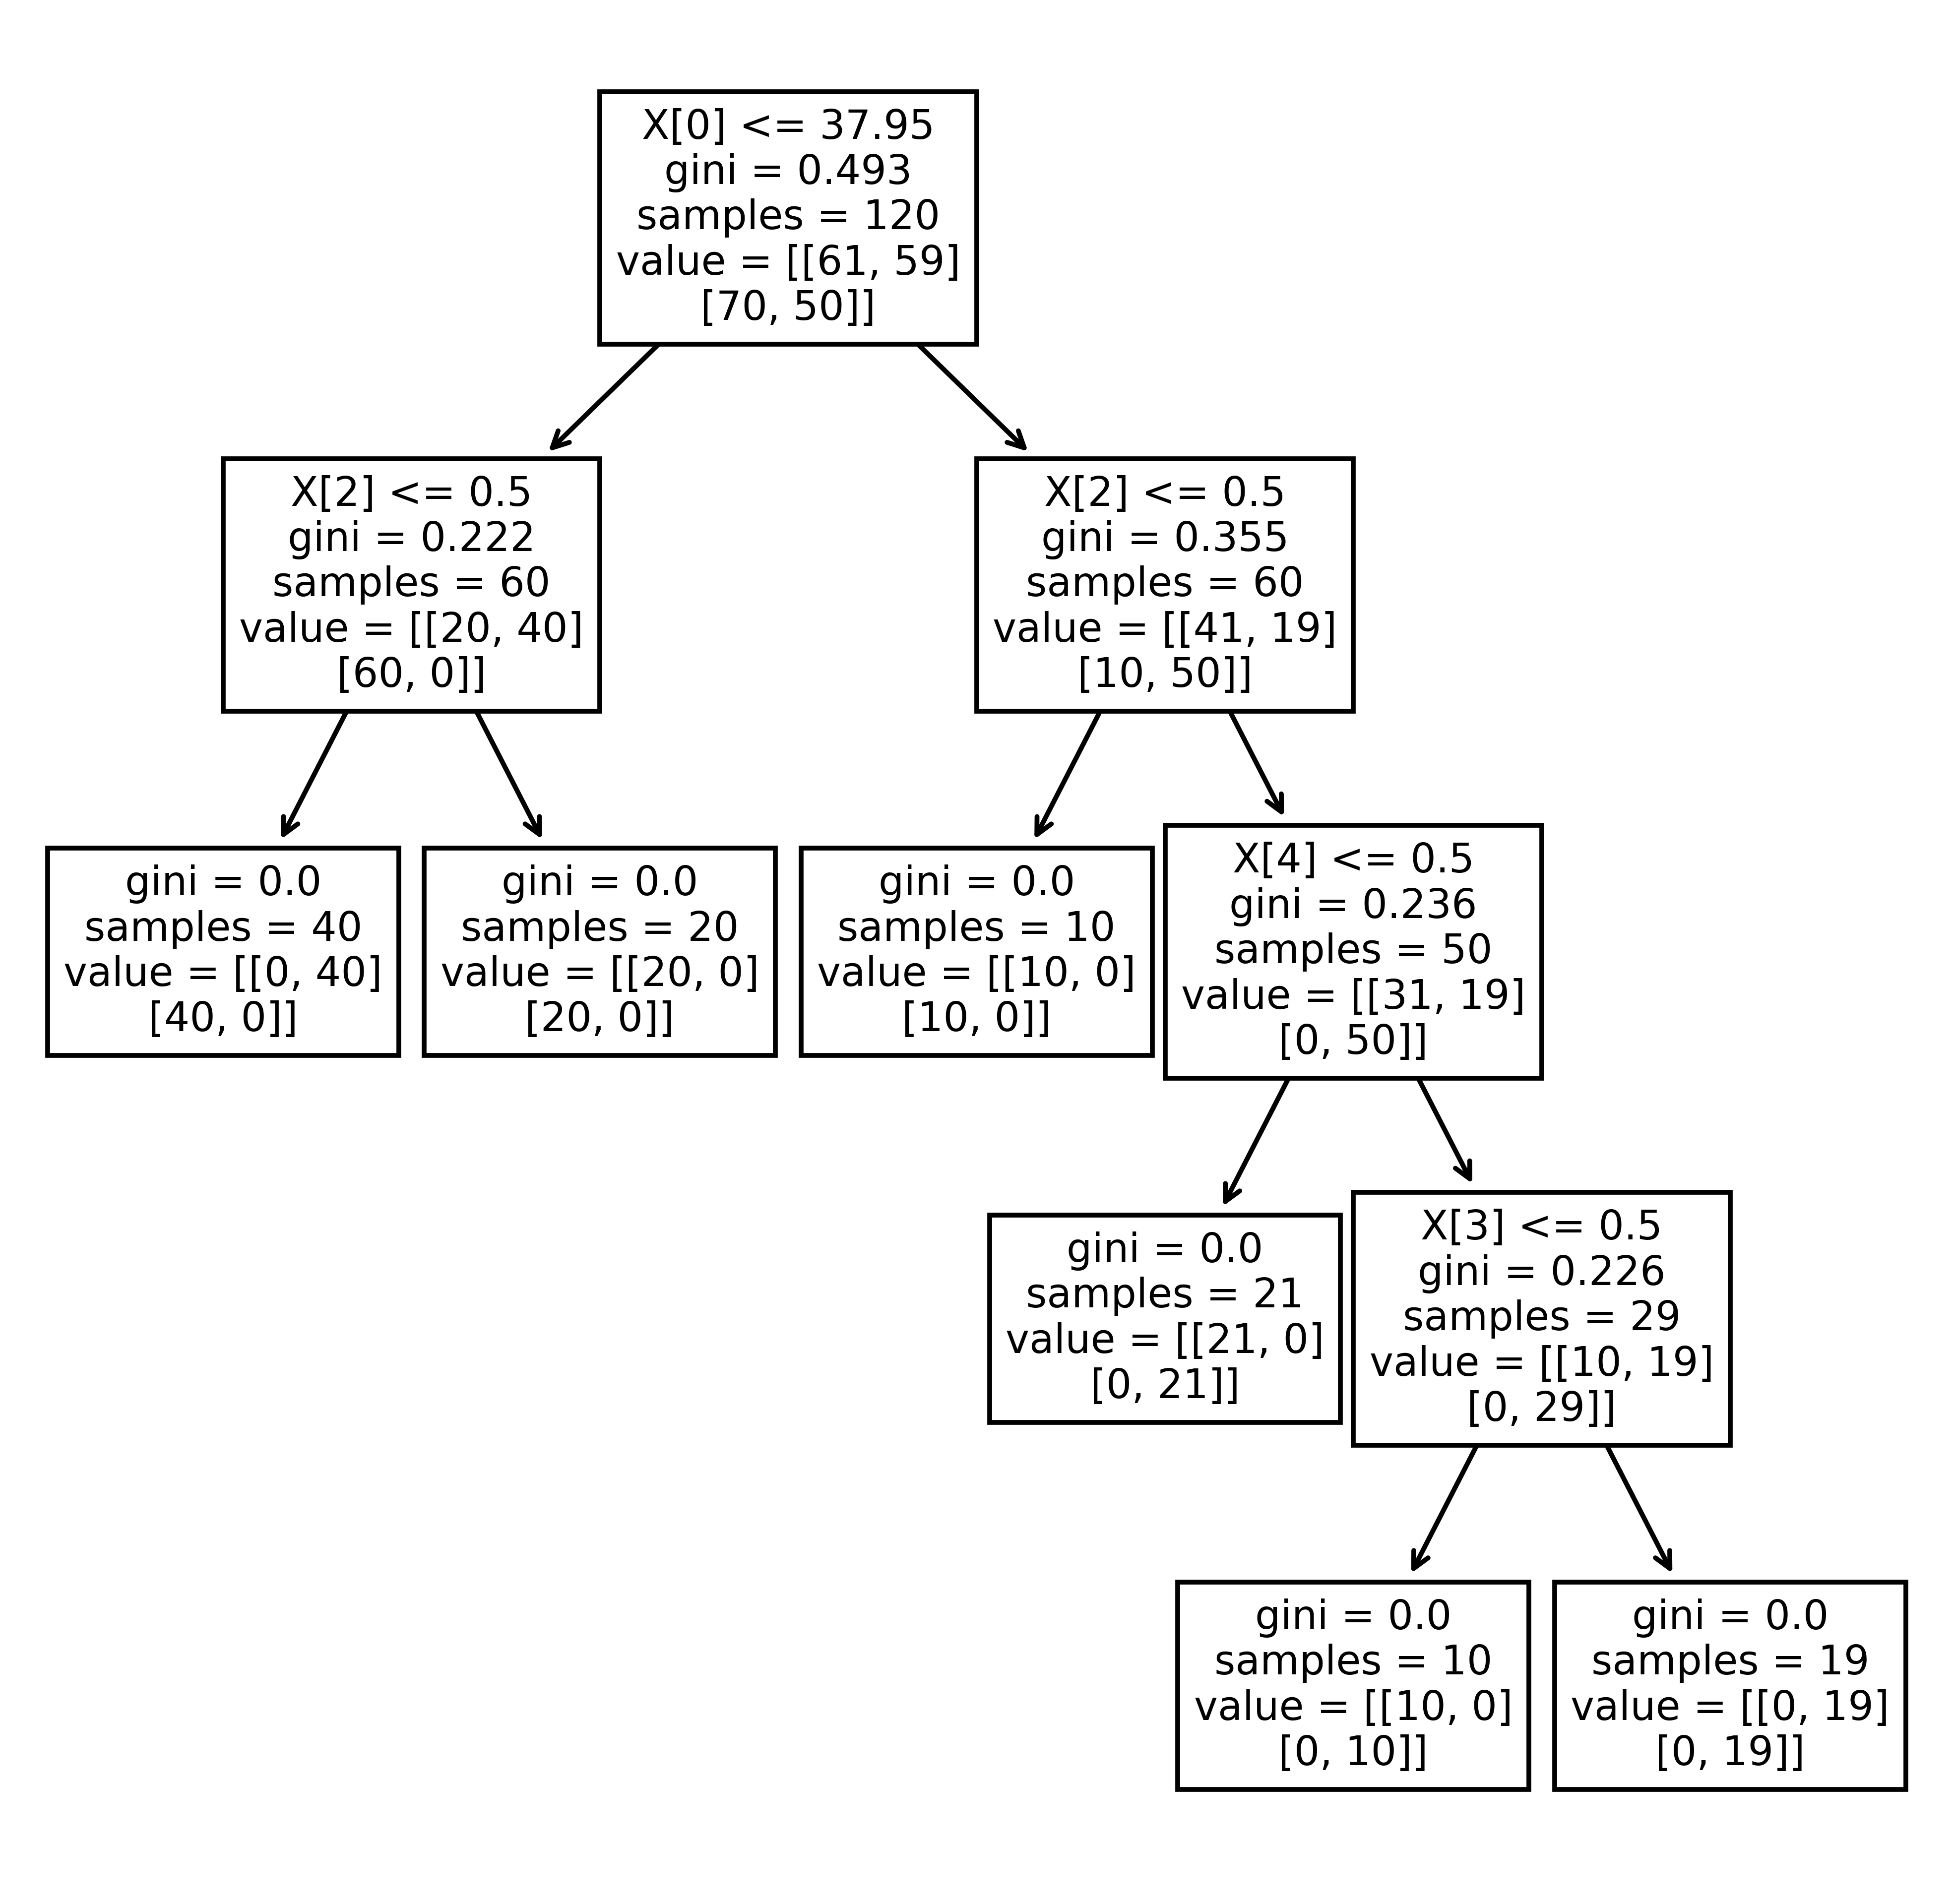

In [161]:
from skmultilearn.problem_transform import LabelPowerset
dtr = tree.DecisionTreeClassifier(random_state = 100)
dtr = dtr.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=700)
tree.plot_tree(dtr)

#### (c) Convert the decision rules into a set of IF-THEN rules

In [173]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """

    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [174]:
tree_to_code(dtr, list(X.columns))

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Temperature <= 37.95000076293945:
    if Lumbar <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.5
      if Micturition <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


#### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

In [165]:
path = dtr.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [166]:
from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': ccp_alphas,
#                'min_samples_leaf': [5],
#                'min_samples_split': [20],
#                'max_depth': [30],
#                'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611]),
                         'random_state': [88]},
             scoring='accuracy', verbose=1)

In [167]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.9


[Text(1519.0, 3329.55, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(759.5, 2589.65, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(379.75, 1849.75, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(1139.25, 1849.75, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(2278.5, 2589.65, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(1898.75, 1849.75, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(2658.25, 1849.75, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(2278.5, 1109.85, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(3038.0, 1109.85, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(2658.25, 369.9500000000003, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(3417.75, 369.9500000000003, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

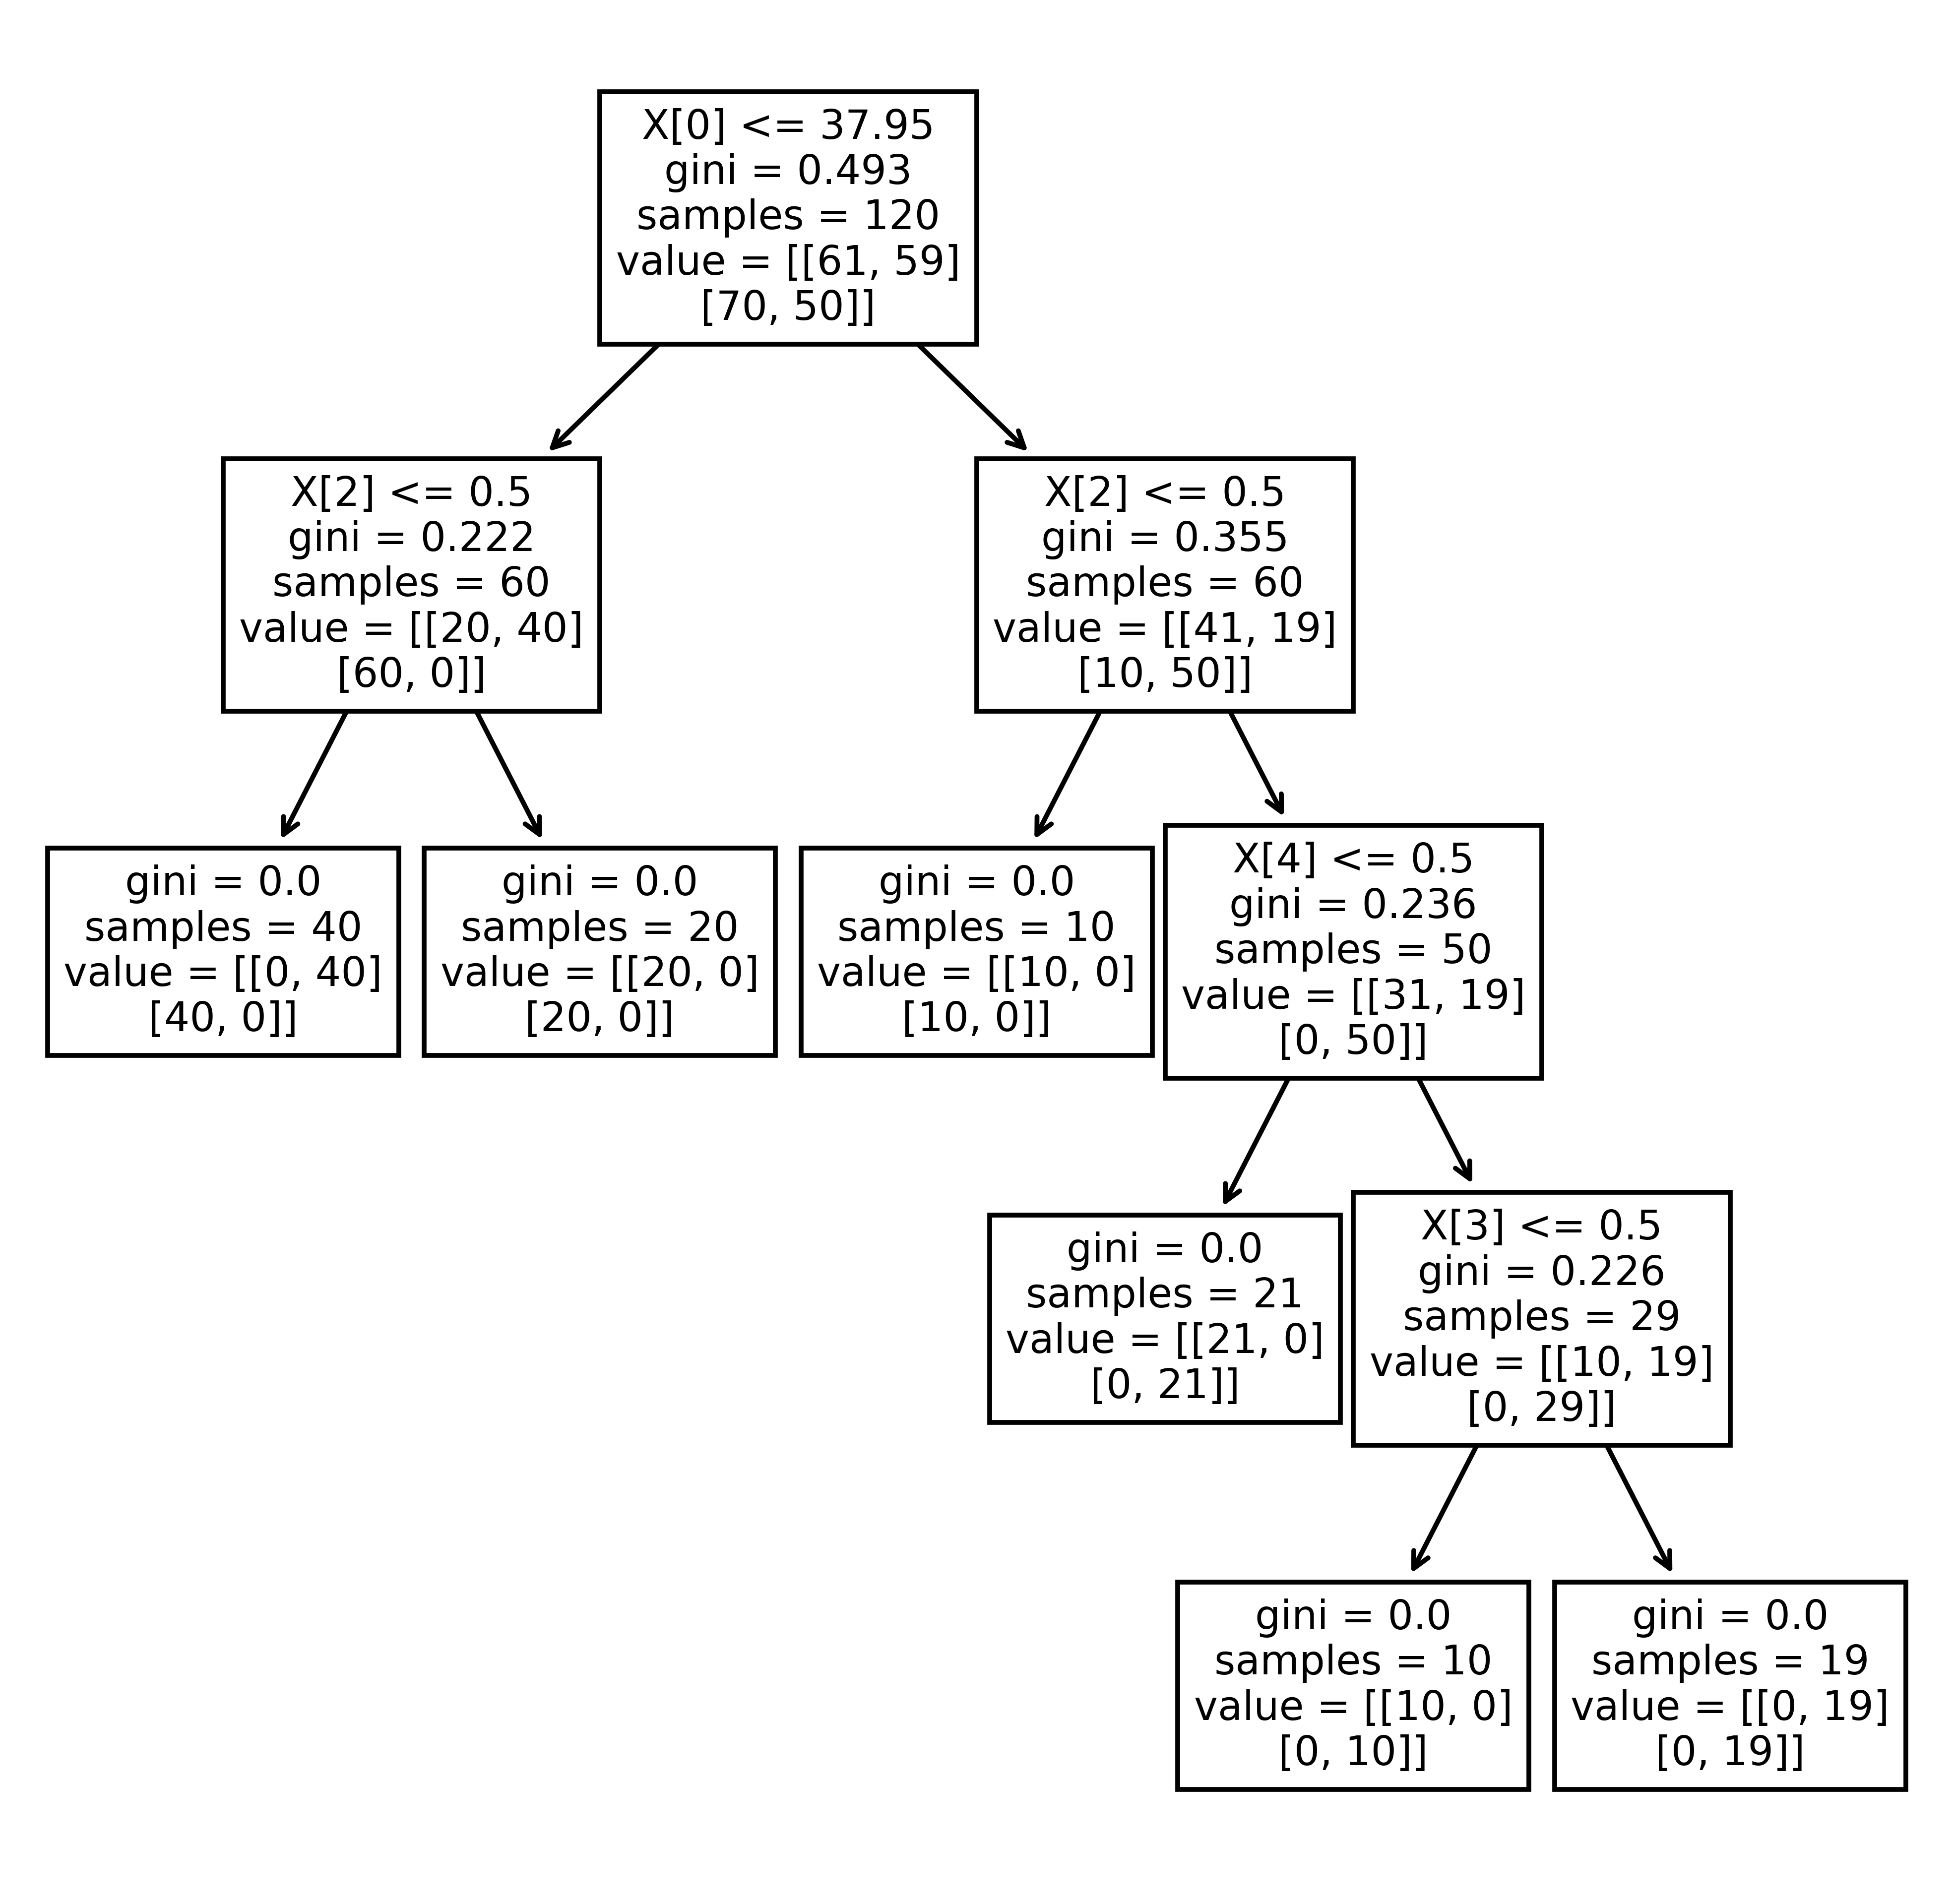

In [172]:
dtr_best = tree.DecisionTreeClassifier(ccp_alpha = dtc_cv_acc.best_params_['ccp_alpha'], random_state = 100)
dtr_best = dtr.fit(X,y)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=700)
tree.plot_tree(dtr_best)

Node count = 11


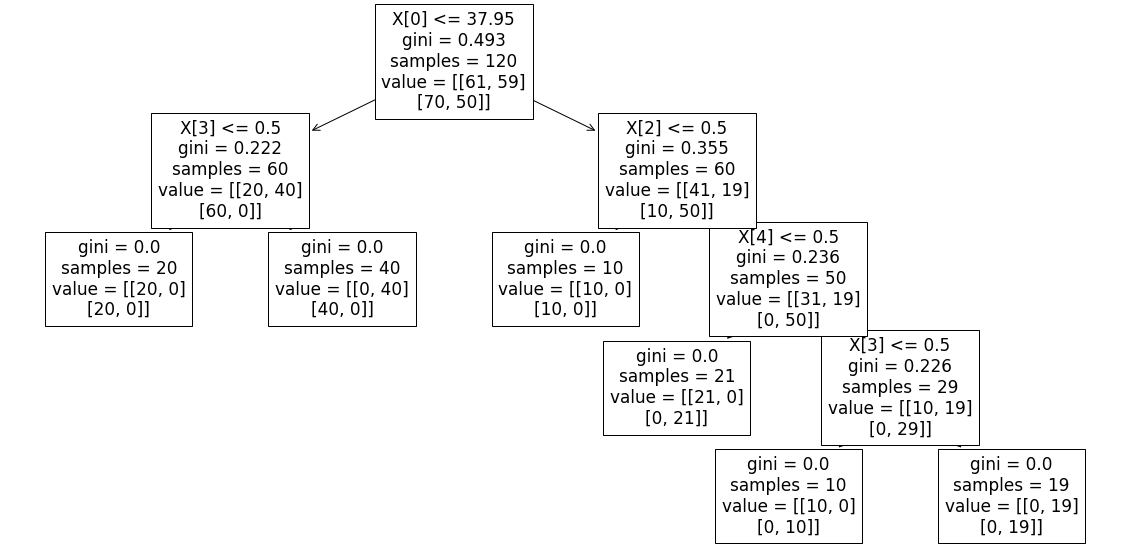

In [169]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
tree.plot_tree(dtc_cv_acc.best_estimator_)
plt.show()

### 2. The LASSO and Boosting for Regression

#### (a) Download the Communities and Crime data. Use the first 1495 rows of data as the training set and the rest as the test set.

In [355]:
name = pd.read_csv('../data/Homework_5_data/communities.names', usecols = [0])
name = name.iloc[56:184].reset_index(drop = True).iloc[:,0]
name = [x.split()[1] for x in name]

In [356]:
commu = pd.read_csv('../data/Homework_5_data/communities.data', header = None, names = name)
commu = commu.drop(commu.columns[[0,1,2,3,4]], axis=1) #5 attributes are non-predictive
commu = commu.replace('?',np.nan) #1994 rows × 123 columns
columns = commu.columns
#split data to train and test
train = commu.iloc[0:1495] #1495 rows × 123 columns
test = commu.iloc[1495:].reset_index(drop=True) #499 rows × 123 columns
# X_train = train.drop(columns = 'ViolentCrimesPerPop')
# y_train = train.iloc[:,-1]

# X_test = test.drop(columns = 'ViolentCrimesPerPop')
# y_test = test.iloc[:,-1]

In [444]:
p = commu.iloc[1495:].reset_index(drop=True)
p

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


#### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [358]:
# use median to replace missing values
#resource : https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_median = SimpleImputer(missing_values = np.nan ,strategy="median")
imp_median.fit(train)
imp_median.fit(test)
train = pd.DataFrame(imp_median.transform(train))
test = pd.DataFrame(imp_median.transform(test))
train

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.140,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.08,0.03,0.73,0.5,0.00,0.165,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.08,0.03,0.73,0.5,0.00,0.165,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.08,0.03,0.73,0.5,0.00,0.165,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.190,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.08,0.03,0.73,0.5,0.00,0.165,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.03


In [329]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.140,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.08,0.03,0.73,0.5,0.00,0.165,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.08,0.03,0.73,0.5,0.00,0.165,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.73,0.5,0.00,0.165,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.73,0.5,0.00,0.165,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180,0.19


#### (c) Plot a correlation matrix for the features in the data set

In [330]:
#drop the last column which is the label 
y_df = df.iloc[:,-1]
feature_df = df.iloc[: , :-1]
feature_df

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.140
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.22,0.02,0.12,0.45,0.08,0.03,0.73,0.5,0.00,0.165
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.22,0.01,0.21,0.02,0.08,0.03,0.73,0.5,0.00,0.165
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.22,0.02,0.39,0.28,0.08,0.03,0.73,0.5,0.00,0.165
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.22,0.04,0.09,0.02,0.08,0.03,0.73,0.5,0.00,0.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.01,0.28,0.05,0.08,0.03,0.73,0.5,0.00,0.165
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.22,0.02,0.37,0.20,0.08,0.03,0.73,0.5,0.00,0.165
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180


<AxesSubplot:>

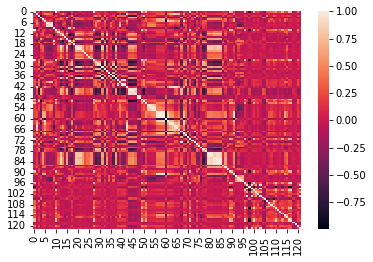

In [331]:
corr = feature_df.corr()
sns.heatmap(corr)

#### (d) Calculate the Coefficient of Variation CV for each feature, where CV =s/m, in which s is sample standard deviation and m is sample mean.

In [332]:
des = feature_df.describe().T
std = des['std']
mean = des['mean']
cv = std / mean
cv

0      2.203503
1      0.353298
2      1.410920
3      0.323782
4      1.359162
         ...   
117    1.562900
118    0.118945
119    0.333483
120    2.555266
121    0.392871
Length: 122, dtype: float64

#### (e) Pick √128  features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [338]:
import math
#select largest n values source https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
n = int(math.sqrt(128))
dt_cv11 = cv.nlargest(n)
index = dt_cv11.index
dt_cv11

108    5.447835
90     4.407702
89     3.485481
49     2.994196
51     2.900497
120    2.555266
27     2.304970
0      2.203503
10     2.001744
71     1.958780
96     1.791793
dtype: float64

In [335]:
a =feature_df[[108, 90, 89, 49, 51, 120, 27, 0, 10, 71, 96]]
a

,108,90,89,49,51,120,27,0,10,71,96
0,0.1,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.030
1,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.025
2,0.0,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.025
3,0.0,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.025
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.025
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.025
1990,0.0,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.025
1991,0.0,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.060
1992,0.0,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.020


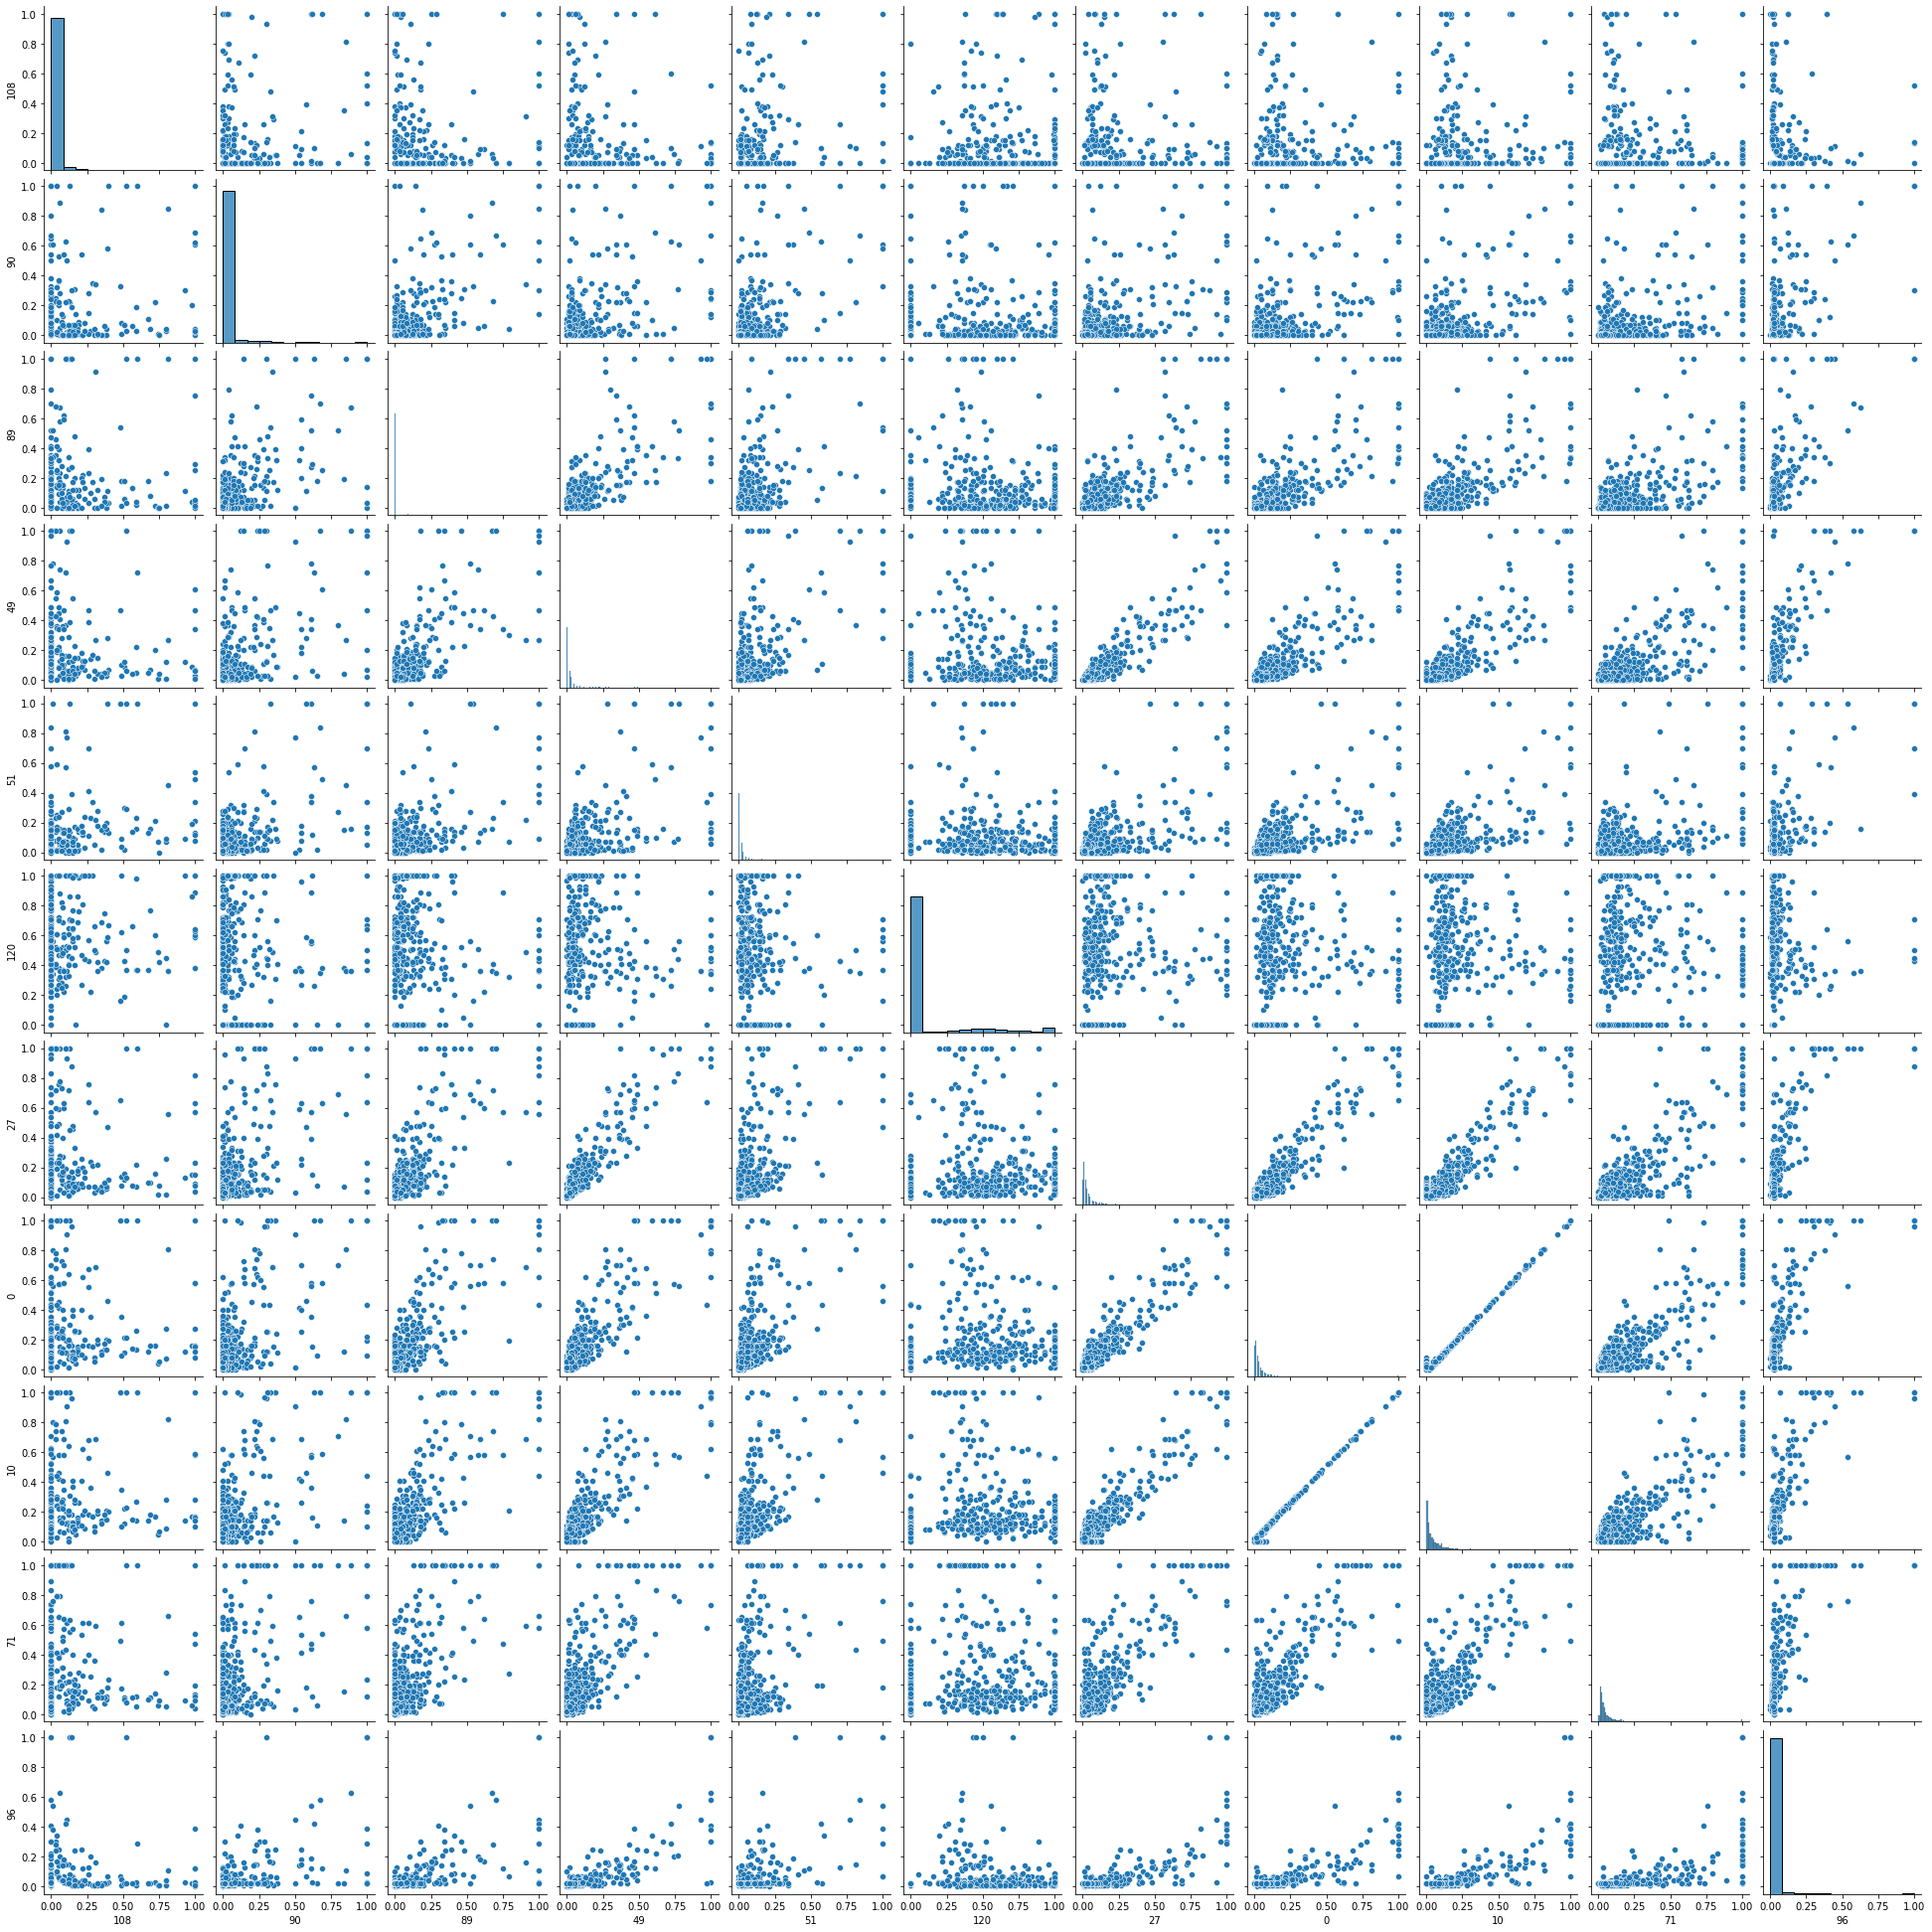

In [336]:
sns.pairplot(a)
plt.show()

<AxesSubplot:>

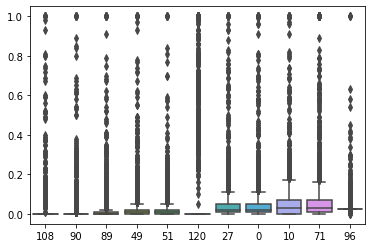

In [339]:
sns.boxplot(data = a)

In [347]:
columns[0], columns[10]

('population', 'numbUrban')

Conclusion: from the scatter plot,we can see that population and numburban are highly correlated. But we cannot say any about significance of features just from the scatter plot.

#### (f) Fit a linear model using least squares to the training set and report the test error

In [462]:
X_train = train.iloc[:,0:122]
y_train = train.iloc[:,-1]

X_test = test.iloc[:,0:122]
y_test = test.iloc[:,-1]

In [470]:
y_test

0      0.12
1      0.11
2      0.12
3      0.06
4      0.12
       ... 
494    0.09
495    0.45
496    0.23
497    0.19
498    0.48
Name: 122, Length: 499, dtype: float64

In [469]:
test

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.08,0.03,0.73,0.5,0.00,0.165,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.08,0.03,0.73,0.5,0.00,0.165,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.08,0.03,0.73,0.5,0.00,0.165,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.08,0.03,0.73,0.5,0.00,0.165,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.73,0.5,0.00,0.165,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.73,0.5,0.00,0.165,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180,0.19


In [463]:
lm = LinearRegression().fit(X_train, y_train)
r_sq = lm.score(X_test, y_test)
pred_f = lm.predict(X_test)
mse = MSE(y_test, pred_f)
print('R-Square:', r_sq)
print('MSE on test set:', round(mse,5))

R-Square: -2.4236208464553525e+20
MSE on test set: 1.1525601784785801e+19


#### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [466]:
clf = RidgeCV(alphas=np.linspace(10**(-4), 0.10, 10*4), cv=5).fit(X_train, y_train)
r_sq = clf.score(X_test, y_test)
pred_g = clf.predict(X_test)
mse = MSE(y_test, pred_g)
print('R-Square:', r_sq)
print('MSE on test set:', round(mse,5))
print('lambda:', clf.alpha_)

R-Square: 0.6243979568679662
MSE on test set: 0.01786
lambda: 0.1


#### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized  features. Report the test error for both cases and compare them.

In [530]:
lasso = LassoCV(alphas=np.arange(10**(-4), 0.10, 10**4), cv=5).fit(X_train, y_train)
r_sq = lasso.score(X_test, y_test)
pred_h = lasso.predict(X_test)
mse = MSE(y_test, pred_h)
selection_train = X_train.iloc[:, lasso.coef_ !=0]
selection_test = X_test.iloc[:, lasso.coef_ !=0]
print('R-Square:', r_sq)
print('MSE on test set:', round(mse,5))
print('lambda:', lasso.alpha_)
print('selected variables for train set are', selection_train.columns )

R-Square: 0.6284778499139659
MSE on test set: 0.01767
lambda: 0.0001
selected variables for train set are Int64Index([  2,   4,   6,   7,   9,  11,  13,  14,  15,  16,  17,  18,  21,
             22,  23,  24,  25,  26,  28,  29,  31,  33,  34,  36,  38,  39,
             40,  44,  45,  46,  48,  49,  50,  51,  55,  59,  61,  63,  64,
             67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  82,
             85,  86,  87,  88,  89,  90,  91,  94,  99, 100, 102, 104, 106,
            107, 108, 111, 112, 113, 114, 115, 116, 118, 119],
           dtype='int64')


In [531]:
#standardized features
from sklearn.preprocessing import StandardScaler
X_train_stand = StandardScaler().fit_transform(selection_train)
X_test_stand = StandardScaler().fit_transform(selection_test)
lasso = LassoCV(alphas=np.arange(10**(-4), 0.10, 10**4), cv=5).fit(selection_train, y_train)
r_sq = lasso.score(selection_test, y_test)
pred_h = lasso.predict(selection_test)
mse = MSE(y_test, pred_h)
print('R-Square:', r_sq)
print('MSE on test set:', round(mse,5))
print('lambda:', lasso.alpha_)

R-Square: 0.6284772592470347
MSE on test set: 0.01767
lambda: 0.0001


Conclusion: After comparing them, I didn't see any changes and results are almost the same. R squred has a very little change. But two models are almost the same, standardized features didn't imporve the model.

#### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained

In [520]:
#resource: https://www.statology.org/principal-components-regression-in-python/
mse = []
r_square = []
best_mse = 1
best_m = 1
for m in range(1,123):
    pca = PCA(n_components=m)
    X_reduced = pca.fit_transform(X_train)
    lg = LinearRegression().fit(X_reduced, y_train)
    cv_score = cross_val_score(lg, X_reduced, y_train, cv=5, scoring = 'neg_mean_squared_error')
    r_score = cross_val_score(lg, X_reduced, y_train, cv=5, scoring = 'r2')
    if np.mean(-cv_score) < best_mse:
        best_mse = np.mean(-cv_score)
        best_m = m
        r = np.mean(r_score)
    mse.append(np.mean(-cv_score))
    r_square.append(np.mean(r_score))

In [524]:
print('the best m chosen by cv:', best_m)
print('mse: ', best_mse)
print('r_square:', r)

the best m chosen by cv: 96
mse:  0.019414871329542543
r_square: 0.6564915571183034


In [561]:
#train model with m = 96
pca = PCA(n_components=96)
X_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.fit_transform(X_test)
lg = LinearRegression().fit(X_reduced, y_train)
lg.fit(X_reduced,y_train)
preds = lg.predict(Xtest_reduced)
r = lg.score(Xtest_reduced,y_test)
mse = MSE(y_test, preds)

# cv_score = cross_val_score(lg, Xtest_reduced, y_test, cv=5, scoring = 'neg_mean_squared_error')
# r_score = cross_val_score(lg, Xtest_reduced, y_test, cv=5, scoring = 'r2')
# mse = np.mean(-cv_score)
# r = np.mean(r_score)
print('R-Square:', r)
print('MSE on test set:', round(mse,5))


R-Square: 0.5090161332343948
MSE on test set: 0.02267


#### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost 5 to fit the model tree. Determine α (the regularization term) using cross-validation

In [551]:
from sklearn.model_selection import KFold
a = np.arange(-5,5, dtype=float)
range_alpha = [10 ** x for x in a]
mse = []
r_square = []
best_mse = 1
best_a = 1
for a in range_alpha:
    xgb_model = xgb.XGBRegressor(reg_alpha = a, random_state = 88)
    kfold = KFold(n_splits=5, shuffle=True)
    kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    kf_cv_r2 = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring = 'r2')
    if np.mean(-kf_cv_scores) < best_mse:
        best_mse = np.mean(-kf_cv_scores)
        best_a = a
        r = np.mean(kf_cv_r2)
    mse.append(np.mean(-kf_cv_scores))
    r_square.append(np.mean(kf_cv_r2))

In [552]:
print('the best alpha chosen by cv:', best_a)
print('mse: ', best_mse)
print('r_square:', r)

the best alpha chosen by cv: 1.0
mse:  0.02125153795471976
r_square: 0.6208271968103654


In [557]:
xgb_test = xgb.XGBRegressor(alpha = 1, n_estimators = 1000)
xgb_test.fit(X_train,y_train)
preds = xgb_test.predict(X_test)
r2 = xgb_test.score(X_test,y_test)
mse = MSE(y_test, preds)

print("best α=1 :",)
print("R square of test set:",round(r2, 5))
print("MSE of test set:", round(mse, 5))

best α=1 :
R square of test set: 0.62603
MSE of test set: 0.01778
